In [1]:
!pip install scikeras
!pip install scikit-learn==1.2.2
!pip install scikeras
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
   ━━

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('/kaggle/input/realtime/real_time_cleaned.csv')
df = df.set_index('block_time')



# Define features (X) and target (y)
X = df.drop(columns=['block_median_fee_rate'])
y = df['block_median_fee_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
important_features = [
    'fee_rate_90th',
    'transaction_count',
    'block_interval',
    'avg_fee_rate',
    'block_height',
    'tx_count',
    'total_fee',
    'bitcoin_price_usd',
    'fee_rate_std',
    'mempool_size_mb',
    'max_fee_rate',
    'median_fee_rate',
    'fee_rate_10th',
    'difficulty',
    'hash_rate',
    'mempool_min_fee',
    'mempool_usage',
    'block_weight',
    'block_version',
    'hist_low_fee_ratio',
    'hist_med_fee_ratio',
    'hist_high_fee_ratio',
    'hist_fee_diversity'
]

# 2. Prepare the data
X = df[important_features]
y = df['block_median_fee_rate']  

In [14]:
# 3. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Reshape data for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def create_cnn_lstm_model(lstm_units=50, conv_filters=64, conv_kernel_size=3, pool_size=2,
                          dropout_rate=0.2, learning_rate=0.001, optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(filters=conv_filters, kernel_size=conv_kernel_size, activation='relu',
                     input_shape=(X_train_cnn_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units//2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

lstm_model = create_lstm_model((X_train_lstm.shape[1], 1))
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=2)

lstm_y_pred = lstm_model.predict(X_test_lstm)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = {}
results['LSTM'] = {
    'MAE': mean_absolute_error(y_test, lstm_y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, lstm_y_pred)),
    'R²': r2_score(y_test, lstm_y_pred)
}

print(results)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 - 2s - 51ms/step - loss: 7.4135
Epoch 2/100
42/42 - 0s - 6ms/step - loss: 2.9201
Epoch 3/100
42/42 - 0s - 6ms/step - loss: 1.4379
Epoch 4/100
42/42 - 0s - 5ms/step - loss: 1.1415
Epoch 5/100
42/42 - 0s - 5ms/step - loss: 0.8816
Epoch 6/100
42/42 - 0s - 6ms/step - loss: 0.8272
Epoch 7/100
42/42 - 0s - 6ms/step - loss: 0.7477
Epoch 8/100
42/42 - 0s - 5ms/step - loss: 0.7039
Epoch 9/100
42/42 - 0s - 6ms/step - loss: 0.7577
Epoch 10/100
42/42 - 0s - 6ms/step - loss: 0.7134
Epoch 11/100
42/42 - 0s - 6ms/step - loss: 0.6570
Epoch 12/100
42/42 - 0s - 5ms/step - loss: 0.7050
Epoch 13/100
42/42 - 0s - 5ms/step - loss: 0.6496
Epoch 14/100
42/42 - 0s - 6ms/step - loss: 0.6267
Epoch 15/100
42/42 - 0s - 5ms/step - loss: 0.6327
Epoch 16/100
42/42 - 0s - 6ms/step - loss: 0.6460
Epoch 17/100
42/42 - 0s - 5ms/step - loss: 0.6480
Epoch 18/100
42/42 - 0s - 6ms/step - loss: 0.6221
Epoch 19/100
42/42 - 0s - 7ms/step - loss: 0.6154
Epoch 20/100
42/42 - 0s - 6ms/step - loss: 0.6278
Epoch 21/100
42/42 -

In [9]:
X_train.shape

(1340, 24)

In [10]:
X_test.shape

(335, 24)

In [16]:
import tensorflow as tf
from keras_tuner import Hyperband


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def build_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('conv_filters', 32, 128, step=32),
        kernel_size=hp.Choice('conv_kernel_size', values=[3, 5, 7]),
        activation='relu',
        input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=hp.Choice('pool_size', values=[2, 3])))
    
    model.add(LSTM(
        units=hp.Int('lstm_units_1', 32, 128, step=32),
        return_sequences=True))
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))
    
    model.add(LSTM(
        units=hp.Int('lstm_units_2', 16, 64, step=16)))
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))
    
    model.add(Dense(1))
    
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = RMSprop(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='keras_tuner',
    project_name='cnn_lstm_tuning'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train_reshaped, y_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[stop_early],
             verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal hyperparameters are:
Conv Filters: {best_hps.get('conv_filters')}
Conv Kernel Size: {best_hps.get('conv_kernel_size')}
Pool Size: {best_hps.get('pool_size')}
LSTM Units 1: {best_hps.get('lstm_units_1')}
LSTM Units 2: {best_hps.get('lstm_units_2')}
Dropout 1: {best_hps.get('dropout_1')}
Dropout 2: {best_hps.get('dropout_2')}
Learning Rate: {best_hps.get('learning_rate')}
Optimizer: {best_hps.get('optimizer')}
""")



Trial 254 Complete [00h 00m 19s]
val_loss: 0.7675644755363464

Best val_loss So Far: 0.4310557246208191
Total elapsed time: 00h 30m 29s

The hyperparameter search is complete. The optimal hyperparameters are:
Conv Filters: 96
Conv Kernel Size: 7
Pool Size: 2
LSTM Units 1: 128
LSTM Units 2: 32
Dropout 1: 0.5
Dropout 2: 0.4
Learning Rate: 0.004561414605105986
Optimizer: adam



In [17]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
y_pred = model.predict(X_test_reshaped)

results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R²': r2_score(y_test, y_pred)
}

print("Test Results:", results)



Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 7.8497 - val_loss: 3.5630
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4309 - val_loss: 1.3264
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1010 - val_loss: 1.0584
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5860 - val_loss: 0.8825
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3753 - val_loss: 0.9355
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1802 - val_loss: 0.6818
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1004 - val_loss: 0.6903
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0683 - val_loss: 0.6764
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9879 - val_loss: 0.8050
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1313 - val_loss: 0.6895
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9969 - val_loss: 0.7094
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8672 - val_l

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Results: {'MAE': 0.48118798684851827, 'RMSE': 0.6928146503856704, 'R²': 0.8859708507007504}

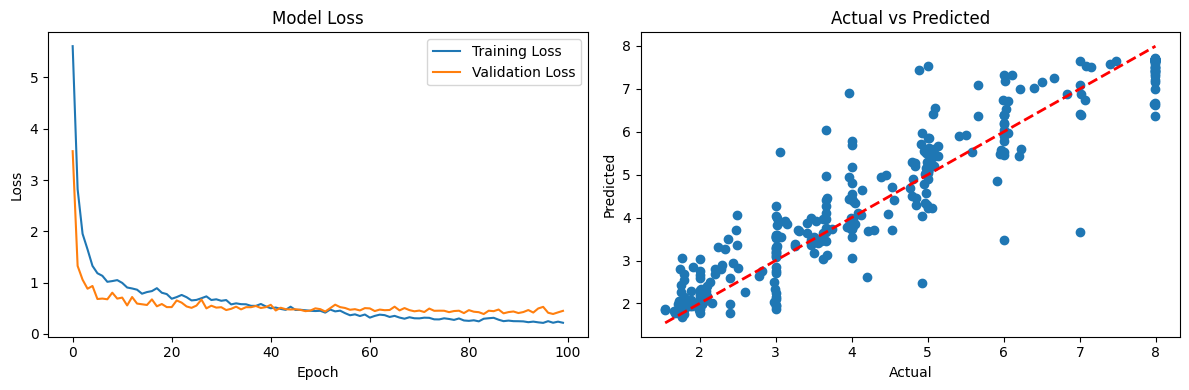

In [18]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 17, 96)         │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 17, 96)         │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 8, 96)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 8, 128)         │       115,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,993 (535.13 KB)

 Trainable params: 136,801 (534.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 7.2389 - val_loss: 3.7033 - learning_rate: 0.0046
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7610 - val_loss: 2.9893 - learning_rate: 0.0046
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5808 - val_loss: 2.0767 - learning_rate: 0.0046
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0963 - val_loss: 1.5526 - learning_rate: 0.0046
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2634 - val_loss: 1.0382 - learning_rate: 0.0046
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0340 - val_loss: 0.9956 - learning_rate: 0.0046
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9675 - val_loss: 1.1530 - learning_rate: 0.0046
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9722 - val_loss: 0.7193 - learning_rate: 0.0046
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8620 - val_loss: 1.0451 - learning_rate: 0.0046
Epoch 10/100
34/34

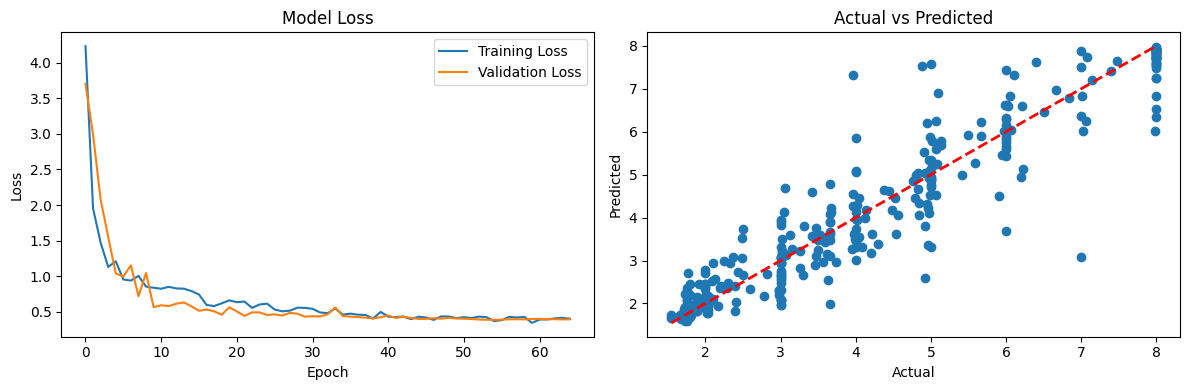

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def create_optimized_cnn_lstm_model():
    model = Sequential([
        # CNN part
        Conv1D(filters=96, kernel_size=7, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        
        # LSTM part
        LSTM(units=128, return_sequences=True),

        Dropout(0.5),
        
        LSTM(units=32, return_sequences=False),
   
        Dropout(0.4),
        
        # Output layer
        Dense(1)
    ])
    
    optimizer = Adam(learning_rate=0.0046)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create and train the model
model = create_optimized_cnn_lstm_model()


model.summary()

# Train the model
history = model.fit(
    X_train_reshaped, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2, 
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
    ]
)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R²': r2_score(y_test, y_pred)
}

print("Test Results:", results)

# Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Results: {'MAE': 0.44352002333945684, 'RMSE': 0.6770400130206987, 'R²': 0.8911043751596035}


In [21]:
results

{'MAE': 0.44352002333945684,
 'RMSE': 0.6770400130206987,
 'R²': 0.8911043751596035}